## Description

This script is used to generate the figure in the dissertation which gives an example of the SST of each product for the same day, 13 April 2009.

Input files are:
1. OSTIA SST L4, `21652_ostia_sst.nc`
2. CCI SST L4, `21652_cci_sst.nc`
3. CCI SST L3, `ESA_CCI_L3U_AATSR_20090413.nc`
4. CCI SST L2, `ESA_CCI_L2P_AVHRRMTA_G_20090413.nc`

In [31]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy import spatial
import xarray as xr

from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes

In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

# Plotting products individually

In [3]:
cci_l4 = xr.open_dataset('../Data/Product_examples/21652_cci_sst.nc')

ostia_l4 = xr.open_dataset('../Data/Product_examples/21652_ostia_sst.nc')

cci_l3 = xr.open_dataset('../Data/Product_examples/ESA_CCI_L3U_AATSR_20090413.nc')

cci_l2 = xr.open_dataset('../Data/Product_examples/ESA_CCI_L2P_AVHRRMTA_G_20090413.nc')

# l2_list = glob.glob('../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_200903*.nc')
# l3_list = glob.glob('../Data/TSST/ESA_CCI_L3U_AATSR_200812*.nc')

In [6]:
cci_l3

<xarray.Dataset>
Dimensions:             (num_observations: 1348755)
Dimensions without coordinates: num_observations
Data variables:
    latitude            (num_observations) float32 ...
    longitude           (num_observations) float32 ...
    along_track_SST     (num_observations) float32 ...
    standard_deviation  (num_observations) float32 ...
    hour                (num_observations) float32 ...
    minute              (num_observations) float32 ...
    second              (num_observations) float32 ...
Attributes:
    title:         Processed along-track ESA CCI L3U SST data from AATSR for ...
    source:        ESA CCI SST http://data.ceda.ac.uk/neodc/esacci/sst
    references:    https://github.com/sanAkel/Harry_uCapeTown/tree/master/ESA...
    date_created:  Year 2020

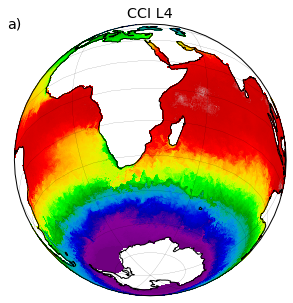

<Figure size 432x288 with 0 Axes>

In [12]:
proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)

plt.figure(figsize=(8,5))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)

img = plt.pcolormesh(cci_l4['lon'], cci_l4['lat'], cci_l4['analysed_sst'][0], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'))
ax.text(0, 1, '(a)', fontsize='x-large', fontweight='roman', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_title('CCI L4', fontsize='x-large')

# plt.savefig('../Figures/hycom_nested.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

In [32]:
print(cci_l4['analysed_sst'][0].min()-273.15)
print(cci_l4['analysed_sst'][0].max()-273.15)

<xarray.DataArray 'analysed_sst' ()>
array(-3.519995)
Coordinates:
    time     datetime64[ns] 2009-04-13T12:00:00
<xarray.DataArray 'analysed_sst' ()>
array(31.959985)
Coordinates:
    time     datetime64[ns] 2009-04-13T12:00:00


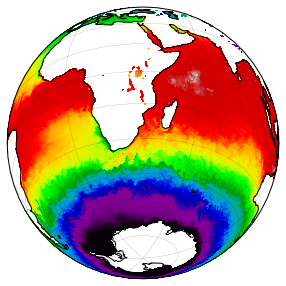

<Figure size 432x288 with 0 Axes>

In [17]:
proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)

plt.figure(figsize=(8,5))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)

img = plt.pcolormesh(ostia_l4['lon'], ostia_l4['lat'], ostia_l4['analysed_sst'][0], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'))
ax.set_title('')
# plt.savefig('../Figures/hycom_nested.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

In [33]:
print(ostia_l4['analysed_sst'][0].min()-273.15)
print(ostia_l4['analysed_sst'][0].max()-273.15)

<xarray.DataArray 'analysed_sst' ()>
array(-2.000006)
Coordinates:
    time     datetime64[ns] 2009-04-13T12:00:00
<xarray.DataArray 'analysed_sst' ()>
array(31.989984)
Coordinates:
    time     datetime64[ns] 2009-04-13T12:00:00


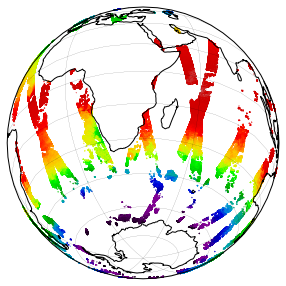

<Figure size 432x288 with 0 Axes>

In [26]:
proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)

plt.figure(figsize=(8,5))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)

img = plt.scatter(cci_l3['longitude'], cci_l3['latitude'], s=0.05, c=cci_l3['along_track_SST'], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'))
ax.set_title('')
# plt.savefig('../Figures/hycom_nested.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

In [35]:
print(cci_l3['along_track_SST'].min()-273.15)
print(cci_l3['along_track_SST'].max()-273.15)

<xarray.DataArray 'along_track_SST' ()>
array(-2.000006)
<xarray.DataArray 'along_track_SST' ()>
array(31.889978)


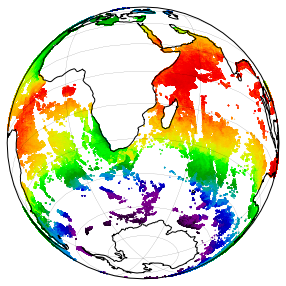

<Figure size 432x288 with 0 Axes>

In [27]:
proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)

plt.figure(figsize=(8,5))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)

img = plt.scatter(cci_l2['longitude'], cci_l2['latitude'], s=0.05, c=cci_l2['along_track_SST'], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'))
ax.set_title('')
# plt.savefig('../Figures/hycom_nested.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

In [36]:
print(cci_l2['along_track_SST'].min()-273.15)
print(cci_l2['along_track_SST'].max()-273.15)

<xarray.DataArray 'along_track_SST' ()>
array(-2.000006)
<xarray.DataArray 'along_track_SST' ()>
array(35.429987)


In [25]:
ostia_l4['analysed_sst'].shape

(1, 3600, 7200)

# Plotting all in single figure

## 'Standard' approach

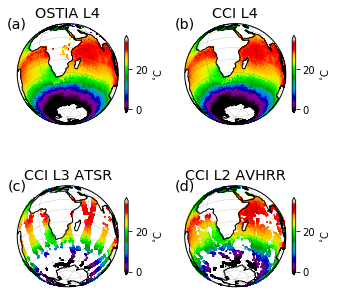

In [47]:
proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)
fig, axs = plt.subplots(2, 2, figsize=(4.8,4.8), sharex=True, sharey=True, subplot_kw={'projection': proj})

# OSTIA L4 plotting code
# axs[0,0] = plt.axes(projection=proj)
im = axs[0,0].pcolormesh(ostia_l4['lon'], ostia_l4['lat'], ostia_l4['analysed_sst'][0]-273.15, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=35)
axs[0,0].coastlines()
axs[0,0].gridlines(color='black', linewidth=0.1)
plt.colorbar(im, ax=axs[0,0], extend='both', label='$^{\circ}$C', shrink=0.5)
axs[0,0].text(0, 1, '(a)', fontsize='x-large', fontweight='roman', horizontalalignment='center', verticalalignment='center', transform=axs[0,0].transAxes)
axs[0,0].set_title('OSTIA L4', fontsize='x-large')

# CCI L4 plotting code
# axs[0,1] = plt.axes(projection=proj)
im = axs[0,1].pcolormesh(cci_l4['lon'], cci_l4['lat'], cci_l4['analysed_sst'][0]-273.15, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=35)
axs[0,1].coastlines()
axs[0,1].gridlines(color='black', linewidth=0.1)
plt.colorbar(im, ax=axs[0,1], extend='both', label='$^{\circ}$C', shrink=0.5)
axs[0,1].text(0, 1, '(b)', fontsize='x-large', fontweight='roman', horizontalalignment='center', verticalalignment='center', transform=axs[0,1].transAxes)
axs[0,1].set_title('CCI L4', fontsize='x-large')

# CCI L3 ATSR plotting code
# axs[1,0] = plt.axes(projection=proj)
im = axs[1,0].scatter(cci_l3['longitude'], cci_l3['latitude'], s=0.05, c=cci_l3['along_track_SST']-273.15, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=35)
axs[1,0].coastlines()
axs[1,0].gridlines(color='black', linewidth=0.1)
plt.colorbar(im, ax=axs[1,0], extend='both', label='$^{\circ}$C', shrink=0.5)
axs[1,0].text(0, 1, '(c)', fontsize='x-large', fontweight='roman', horizontalalignment='center', verticalalignment='center', transform=axs[1,0].transAxes)
axs[1,0].set_title('CCI L3 ATSR', fontsize='x-large')

# CCI L2 AVHRR METOP-A plotting code
# axs[1,1] = plt.axes(projection=proj)
im = axs[1,1].scatter(cci_l2['longitude'], cci_l2['latitude'], s=0.05, c=cci_l2['along_track_SST']-273.15, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=35)
axs[1,1].coastlines()
axs[1,1].gridlines(color='black', linewidth=0.1)
plt.colorbar(im, ax=axs[1,1], extend='both', label='$^{\circ}$C', shrink=0.5)
axs[1,1].text(0, 1, '(d)', fontsize='x-large', fontweight='roman', horizontalalignment='center', verticalalignment='center', transform=axs[1,1].transAxes)
axs[1,1].set_title('CCI L2 AVHRR', fontsize='x-large')

plt.tight_layout()
fig.savefig('../Figures/Product_examples_13042009_48.png', dpi=300, bbox_inches='tight')

## AxesGrid approach

In [43]:
# sources:
# https://jdhao.github.io/2017/06/11/mpl_multiplot_one_colorbar/
# https://geocat-comp.readthedocs.io/en/latest/examples.html

proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)
axes_class = (GeoAxes, dict(map_projection=proj))

fig = plt.figure(figsize=(9, 9))

axs = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(2, 2),
                axes_pad=0.5,
                cbar_mode='single',
                cbar_location='bottom',
                cbar_pad=0.1,
                label_mode=''
                )
#=========================================================================================

im = axs[0].pcolormesh(ostia_l4['lon'], ostia_l4['lat'], ostia_l4['analysed_sst'][0]-273.15, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=35)
axs[0].coastlines()
axs[0].gridlines(color='black', linewidth=0.1)
# plt.colorbar(im, ax=axs[0], extend='both', label='$^{\circ}$C')
axs[0].text(0, 1, '(a)', fontsize='x-large', fontweight='roman', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
axs[0].set_title('OSTIA L4', fontsize='x-large')

# CCI L4 plotting code
# axs[1] = plt.axes(projection=proj)
im = axs[1].pcolormesh(cci_l4['lon'], cci_l4['lat'], cci_l4['analysed_sst'][0]-273.15, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=35)
axs[1].coastlines()
axs[1].gridlines(color='black', linewidth=0.1)
# plt.colorbar(im, ax=axs[1], extend='both', label='$^{\circ}$C')
axs[1].text(0, 1, '(b)', fontsize='x-large', fontweight='roman', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)
axs[1].set_title('CCI L4', fontsize='x-large')

# CCI L3 ATSR plotting code
# axs[2] = plt.axes(projection=proj)
im = axs[2].scatter(cci_l3['longitude'], cci_l3['latitude'], s=0.05, c=cci_l3['along_track_SST']-273.15, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=35)
axs[2].coastlines()
axs[2].gridlines(color='black', linewidth=0.1)
# plt.colorbar(im, ax=axs[2], extend='both', label='$^{\circ}$C')
axs[2].text(0, 1, '(c)', fontsize='x-large', fontweight='roman', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes)
axs[2].set_title('CCI L3 ATSR', fontsize='x-large')

# CCI L2 AVHRR METOP-A plotting code
# axs[3] = plt.axes(projection=proj)
im = axs[3].scatter(cci_l2['longitude'], cci_l2['latitude'], s=0.05, c=cci_l2['along_track_SST']-273.15, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=35)
axs[3].coastlines()
axs[3].gridlines(color='black', linewidth=0.1)
# plt.colorbar(im, ax=axs[3], extend='both', label='$^{\circ}$C')
axs[3].text(0, 1, '(d)', fontsize='x-large', fontweight='roman', horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes)
axs[3].set_title('CCI L2 AVHRR', fontsize='x-large')

#=========================================================================================

cb = axs.cbar_axes[0].colorbar(im, extend='both')
# cb.axis[cb.orientation].label.set_text('$^{\circ}$C')
cb_axis = cb.axis[cb.orientation]
cb_axis.label.set_text('$^{\circ}$C')
# (label='$^{\circ}$C')

# Add color bar and label details (title, size, etc.)
# cax = axgr.cbar_axes[0]
# cax.colorbar(p)
# axis = cax.axis[cax.orientation]
# axis.label.set_text(r'Temperature ($^{\circ} C$)')
# axis.label.set_size(16)

# for ax in grid:
#     ax.set_axis_off()
#     im = ax.imshow(np.random.random((16,16)), vmin=0, vmax=1)

# when cbar_mode is 'single', for ax in grid, ax.cax = grid.cbar_axes[0]

# cbar = ax.cax.colorbar(im)
# cbar = grid.cbar_axes[0].colorbar(im)

# cbar.ax.set_yticks(np.arange(0, 1.1, 0.5))
# cbar.ax.set_yticklabels(['low', 'medium', 'high'])
plt.show()

AttributeError: 'Colorbar' object has no attribute 'axis'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fc8eca33e18> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fc91722dc80> (for post_execute):


KeyboardInterrupt: 

In [27]:
for i in grid:
    print(i)

Axes(0.16078,0.531058;0.348942x0.348942)
Axes(0.515278,0.531058;0.348942x0.348942)
Axes(0.16078,0.176561;0.348942x0.348942)
Axes(0.515278,0.176561;0.348942x0.348942)


In [38]:
cb